In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier


In [22]:
path_in = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv"

In [23]:
df = pd.read_csv(path_in)

In [24]:
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [25]:
df.tail()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
995,3,10,39,0,0,27.0,3,0,0.0,1,3,1
996,1,7,34,0,2,22.0,5,5,0.0,1,1,1
997,3,67,59,0,40,944.0,5,33,0.0,1,1,4
998,3,70,49,0,18,87.0,2,22,0.0,1,1,3
999,3,50,36,1,7,39.0,3,3,0.0,1,3,2


In [26]:
df.shape

(1000, 12)

In [27]:
from sklearn.utils import shuffle

shuffle(df).head()
#df.isnull().sum()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
38,1,11,41,1,0,39.0,1,1,0.0,1,2,3
760,3,43,38,1,7,18.0,3,8,0.0,1,3,4
432,2,15,35,0,10,25.0,2,3,0.0,0,1,1
179,1,3,33,0,8,51.0,4,0,0.0,1,1,1
361,2,6,24,0,2,28.0,1,5,0.0,0,2,3


In [28]:
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1244ab700>]],
      dtype=object)

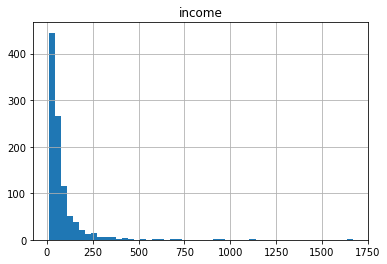

In [29]:
df.hist('income', bins = 50)

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
scaler = StandardScaler()

In [32]:
X = df.drop('custcat', axis = 1)

In [33]:
X.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside
0,2,13,44,1,9,64.0,4,5,0.0,0,2
1,3,11,33,1,7,136.0,5,5,0.0,0,6
2,3,68,52,1,24,116.0,1,29,0.0,1,2
3,2,33,33,0,12,33.0,2,0,0.0,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4


In [34]:
y = df['custcat']

In [35]:
y.head()

0    1
1    4
2    3
3    1
4    3
Name: custcat, dtype: int64

In [36]:
type(X)

pandas.core.frame.DataFrame

In [37]:
scaler.fit(X)

StandardScaler()

In [38]:
scaler.transform(X)

array([[-0.02696767, -1.055125  ,  0.18450456, ..., -0.22207644,
        -1.03459817, -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243, ..., -0.22207644,
        -1.03459817,  2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601, ..., -0.22207644,
         0.96655883, -0.23065004],
       ...,
       [ 1.19883553,  1.47425216,  1.37948227, ..., -0.22207644,
         0.96655883, -0.92747794],
       [ 1.19883553,  1.61477311,  0.58283046, ..., -0.22207644,
         0.96655883, -0.92747794],
       [ 1.19883553,  0.67796676, -0.45281689, ..., -0.22207644,
         0.96655883,  0.46617787]])

In [41]:
k = 4

KNN = KNeighborsClassifier(n_neighbors = k)

In [42]:
KNN.fit(X, y)

KNeighborsClassifier(n_neighbors=4)

In [43]:
yhat = KNN.predict(X)

In [44]:
from sklearn import metrics

In [47]:
metrics.accuracy_score(y, yhat)

0.555

In [48]:
yhat

array([1, 4, 3, 1, 3, 3, 2, 4, 3, 2, 1, 3, 4, 4, 1, 4, 3, 1, 1, 4, 1, 1,
       3, 1, 1, 1, 4, 3, 1, 1, 2, 2, 3, 4, 4, 1, 4, 3, 3, 3, 3, 3, 1, 1,
       2, 2, 3, 4, 1, 1, 1, 2, 1, 1, 4, 1, 2, 1, 1, 2, 2, 1, 1, 4, 3, 3,
       1, 3, 4, 1, 1, 1, 4, 2, 3, 1, 2, 3, 3, 4, 4, 1, 4, 3, 4, 2, 1, 2,
       1, 1, 1, 1, 4, 4, 1, 2, 3, 3, 1, 2, 2, 4, 1, 2, 1, 1, 3, 2, 1, 2,
       2, 2, 1, 2, 2, 1, 1, 3, 3, 1, 3, 1, 1, 4, 1, 2, 3, 2, 2, 4, 3, 1,
       1, 2, 3, 1, 4, 3, 3, 4, 3, 1, 1, 3, 3, 4, 4, 2, 3, 2, 1, 3, 2, 3,
       4, 1, 1, 2, 3, 3, 2, 3, 3, 1, 2, 3, 1, 1, 4, 4, 3, 3, 4, 1, 4, 1,
       3, 2, 2, 1, 3, 1, 2, 1, 3, 2, 1, 3, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2,
       1, 4, 1, 1, 1, 2, 4, 1, 3, 3, 4, 2, 1, 1, 1, 1, 3, 2, 3, 2, 3, 1,
       3, 1, 2, 3, 1, 3, 2, 1, 1, 3, 1, 3, 2, 1, 1, 2, 3, 4, 1, 1, 1, 2,
       3, 2, 1, 3, 2, 1, 3, 2, 1, 3, 2, 2, 1, 4, 2, 1, 4, 1, 4, 4, 2, 4,
       1, 4, 1, 3, 3, 1, 2, 2, 3, 1, 3, 2, 2, 3, 4, 1, 2, 4, 1, 1, 1, 3,
       1, 1, 3, 2, 1, 3, 2, 3, 3, 4, 3, 1, 4, 2, 3,

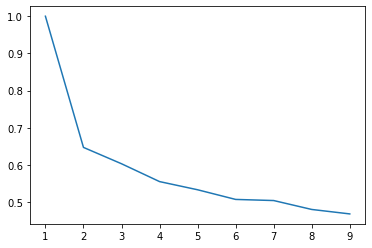

In [49]:
errors = []

for k in range(1, 10):
    
    knn = KNeighborsClassifier( n_neighbors = k)
    knn.fit(X, y)
    yhat = knn.predict(X)
    errors.append(metrics.accuracy_score(yhat, y))
    

    
plt.plot(range(1,10), errors)